In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from lf_utils import *
from lf_ev import *

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
hdul = fits.open(r"E:\PhD\Jon\GAMA data\gkvScienceCatv02.fits")
data = hdul[1].data
t=Table(data)
df = t.to_pandas()

hdul2 = fits.open(r"E:\PhD\Jon\GAMA data\gkvInputCatv02_reduced.fits")
data2 = hdul2[1].data
t2=Table(data2)
dfFiber = t2.to_pandas()

In [3]:
df2 = df[(df['Z']>-8) & (df['SC']>=7)]
df2 = pd.merge(df2, dfFiber[['uberID', 'mag_app_Zt']], on='uberID', how='left')
df2 = df2.rename(columns={"mag_app_Zt": "FIBERMAG_R"})
df2 = df2.dropna(subset=['FIBERMAG_R'])

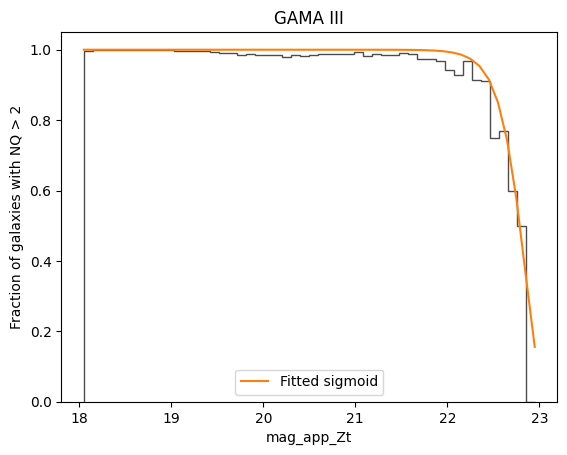

Fitted sigmoid parameters: a=24.56689225357969, b=6.105849552251747, c=36045.00699352352


In [4]:
num_bins = 50

bins = np.linspace(18, 23, num_bins + 1)
labels = np.digitize(df2['FIBERMAG_R'], bins) - 1

fractions = []
for i in range(num_bins):
    bin_mask = labels == i
    if bin_mask.sum() > 0:
        fraction = (df2.loc[bin_mask, 'NQ'] > 2).mean()
    else:
        fraction = 0
    fractions.append(fraction)

bin_centers = (bins[:-1] + bins[1:]) / 2

def sigmoid(x, a, b, c):
    y = (1.0/(1 + np.exp(b*(x-a))))**c
    return y

popt, pcov = curve_fit(sigmoid, bin_centers, fractions, p0=[22.42, 2.55, 2.24], maxfev=10000)
p = popt

plt.hist(bin_centers, bins=num_bins, weights=fractions, histtype='step', edgecolor='black', alpha=0.7)
plt.plot(bin_centers, sigmoid(bin_centers, *popt), label='Fitted sigmoid')
plt.xlabel('mag_app_Zt')
plt.ylabel('Fraction of galaxies with NQ > 2')
plt.title('GAMA III')
plt.legend()
plt.show()

print(f"Fitted sigmoid parameters: a={popt[0]}, b={popt[1]}, c={popt[2]}")

In [5]:
df = df[df['SC']>=7]

In [6]:
df = pd.merge(df, dfFiber[['uberID', 'mag_app_Zt']], on='uberID', how='left')
df = df.rename(columns={"mag_app_Zt": "FIBERMAG_R"})
df = add_column(df, column_file = r"E:\PhD\Jon\GAMA data\SFMPhotoZv01.fits", column_name = 'zmax', common_column = 'uberID')
df.loc[df['NQ'] < 3, 'Z'] = df.loc[df['NQ'] < 3, 'zmax']
df.loc[df['NQ'] < 3, 'NQ'] = 10
print(len(df[df['NQ']==10]))

10108


In [7]:
df = df[(df['Z']>0.002) & (df['Z']<0.65)]

In [8]:
df

,uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,...,duplicate,mask,starmask,uberclass,CATAID,SC,Z,NQ,FIBERMAG_R,zmax
0,128980003711188,129.579930,-1.029780,129.579933,-1.029784,129.579917,-1.029802,-3.252273e-13,3.965989e-12,-0.251301,...,False,False,False,1,3600151,8,0.08185,4,18.345509,0.12
1,128980004608892,129.579121,-1.246004,129.579142,-1.245971,129.579127,-1.245989,-6.235091e-13,4.453040e-12,-0.251301,...,False,False,False,1,3874273,7,0.30551,4,20.691059,0.27
2,128980005210530,129.578549,-1.091716,129.578537,-1.091739,129.578521,-1.091757,-1.983639e-13,4.022541e-12,-0.251301,...,False,False,False,1,3600249,8,0.28994,4,19.311277,0.30
3,128980005309861,129.578474,-1.154733,129.578459,-1.154730,129.578443,-1.154749,-1.950925e-13,4.120472e-12,-0.251301,...,False,False,False,1,3600327,7,0.27092,4,20.822168,0.26
4,128980008210800,129.575720,-1.066314,129.575705,-1.066317,129.575689,-1.066335,-4.437626e-13,4.039319e-12,-0.251301,...,False,False,False,1,3600321,7,0.29026,4,20.905251,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205535,350701210901957,350.152979,-30.597441,350.153048,-30.597472,350.153079,-30.597509,-3.552066e-13,4.013951e-12,-0.184533,...,False,False,False,1,5348972,7,0.24000,10,20.868862,0.24
205536,350701211105453,350.155003,-30.268311,350.154994,-30.268291,350.155026,-30.268328,-2.572462e-13,4.066720e-12,-0.184533,...,False,False,False,1,5350314,8,0.37250,4,19.997862,0.36
205537,350701212604914,350.153042,-30.319001,350.153025,-30.319035,350.153057,-30.319073,-4.109313e-13,4.059225e-12,-0.184533,...,False,False,False,1,5350126,8,0.08021,4,20.519758,0.08
205538,350701223301873,350.139455,-30.605329,350.139431,-30.605313,350.139462,-30.605350,-4.958975e-13,3.998534e-12,-0.184533,...,False,False,False,1,5348928,8,0.16611,4,20.451103,0.19


c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\kcorrect\template.py:226: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)
c:\Users\adrie\Code\Jon current work\kcorr.py:30: RuntimeWarning: divide by zero encountered in power
  ivar = flux_err**-2


Fixed 31692 missing fluxes
Fitting SED coefficients ...
Replacing 33 bad fits with mean
Calculating k-corrections ...


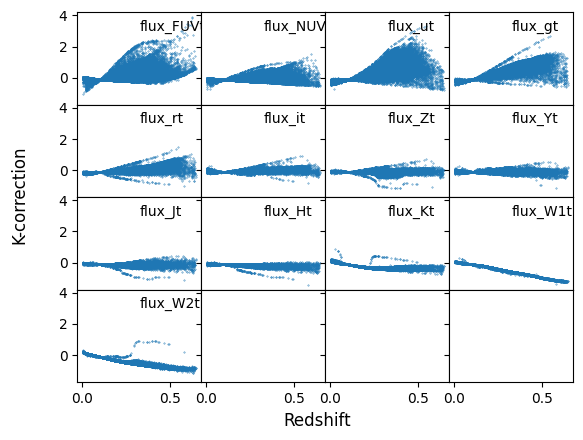

Calculating polynomial coefficients ...


  0%|          | 0/202979 [00:00<?, ?it/s]

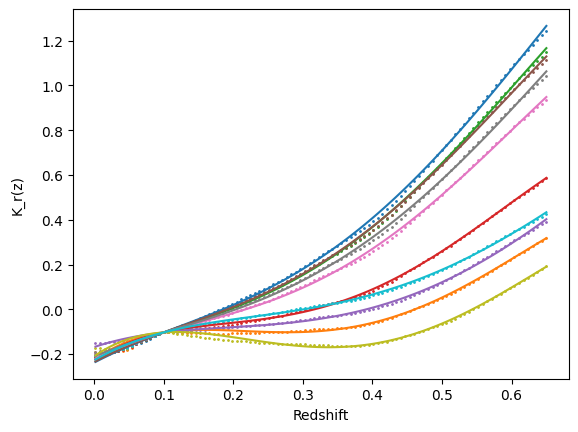

In [9]:
df = kcorrection(df, zrange=[0.002, 0.65], z0=0.1, 
                 responses = ['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 
                              'vista_h', 'vista_k', 'wise_w1', 'wise_w2'], 
                 fnames = ['flux_FUVt', 'flux_NUVt', 'flux_ut', 'flux_gt', 'flux_rt', 'flux_it', 'flux_Zt', 'flux_Yt', 
                           'flux_Jt', 'flux_Ht', 'flux_Kt', 'flux_W1t', 'flux_W2t'], 
                 ferrnames = ['flux_err_FUVt', 'flux_err_NUVt', 'flux_err_ut', 'flux_err_gt', 'flux_err_rt', 'flux_err_it', 
                              'flux_err_Zt', 'flux_err_Yt', 'flux_err_Jt', 'flux_err_Ht', 'flux_err_Kt', 'flux_err_W1t', 
                              'flux_err_W2t'], 
                 ref_index = 4, avg_index = 6, redshift='Z', survey='GAMAIII')

In [10]:
df = luminosity_distance(df, redshift='Z', H0=100, Om0=0.3, Ode0=0.7)
df = magnitude(df, bands=['FUV', 'NUV', 'u', 'g', 'r', 'i', 'Z', 'Y', 'J', 'H', 'K', 'W1', 'W2'], 
               fluxcols = ['flux_FUVt', 'flux_NUVt', 'flux_ut', 'flux_gt', 'flux_rt', 'flux_it', 'flux_Zt', 'flux_Yt', 'flux_Jt', 'flux_Ht', 'flux_Kt', 'flux_W1t', 'flux_W2t'], 
               kcorrcols = ['kcorr_galex_FUV', 'kcorr_galex_NUV', 'kcorr_vst_u', 'kcorr_vst_g', 'kcorr_vst_r', 'kcorr_vst_i', 'kcorr_vista_z', 'kcorr_vista_y', 'kcorr_vista_j', 'kcorr_vista_h', 
                            'kcorr_vista_k', 'kcorr_wise_w1', 'kcorr_wise_w2'])
df = colour(df, mag = ['m_FUV', 'm_NUV', 'm_u', 'm_g', 'm_r', 'm_i', 'm_Z', 'm_Y', 'm_J', 'm_H', 'm_K', 'm_W1', 'm_W2'], 
            bands = ['FUV', 'NUV', 'u', 'g', 'r', 'i', 'Z', 'Y', 'J', 'H', 'K', 'W1', 'W2'], ref_mag = 'm_r')

c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr

In [11]:
df = df[df['m_r']<19.65]

In [12]:
df

,uberID,RAcen,Deccen,RAmax,Decmax,RAGAIA,DecGAIA,sky_mean,skyRMS_mean,log10seeing,...,NUV-r_colour,u-r_colour,r-r_colour,r-Z_colour,r-Y_colour,r-J_colour,r-H_colour,r-K_colour,r-W1_colour,r-W2_colour
0,128980003711188,129.579930,-1.029780,129.579933,-1.029784,129.579917,-1.029802,-3.252273e-13,3.965989e-12,-0.251301,...,5.877697,2.830893,0.0,0.737471,1.023182,1.190369,1.475967,1.362270,0.637230,-0.025646
1,128980004608892,129.579121,-1.246004,129.579142,-1.245971,129.579127,-1.245989,-6.235091e-13,4.453040e-12,-0.251301,...,2.367945,1.431953,0.0,0.476513,0.613514,0.682880,0.935436,1.033310,0.820297,0.015377
2,128980005210530,129.578549,-1.091716,129.578537,-1.091739,129.578521,-1.091757,-1.983639e-13,4.022541e-12,-0.251301,...,5.429607,3.505753,0.0,0.824547,1.104906,1.343567,1.799797,1.909119,1.149389,0.733814
3,128980005309861,129.578474,-1.154733,129.578459,-1.154730,129.578443,-1.154749,-1.950925e-13,4.120472e-12,-0.251301,...,2.798977,1.759880,0.0,0.560650,0.728157,0.901875,1.174353,1.384254,0.455494,0.129602
4,128980008210800,129.575720,-1.066314,129.575705,-1.066317,129.575689,-1.066335,-4.437626e-13,4.039319e-12,-0.251301,...,2.467520,1.737406,0.0,0.556911,0.650496,0.876665,1.042046,1.294468,0.394466,-0.138987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202974,350701210901957,350.152979,-30.597441,350.153048,-30.597472,350.153079,-30.597509,-3.552066e-13,4.013951e-12,-0.184533,...,1.527824,1.259977,0.0,0.351574,0.344261,0.343910,0.454041,0.687973,-0.482010,-0.788441
202975,350701211105453,350.155003,-30.268311,350.154994,-30.268291,350.155026,-30.268328,-2.572462e-13,4.066720e-12,-0.184533,...,2.068850,1.610182,0.0,0.643566,0.659203,0.824429,0.973963,1.357111,0.700598,0.415573
202976,350701212604914,350.153042,-30.319001,350.153025,-30.319035,350.153057,-30.319073,-4.109313e-13,4.059225e-12,-0.184533,...,1.962811,1.278103,0.0,0.397661,0.491325,0.385857,0.711929,0.509132,-0.321373,-0.952269
202977,350701223301873,350.139455,-30.605329,350.139431,-30.605313,350.139462,-30.605350,-4.958975e-13,3.998534e-12,-0.184533,...,2.340584,1.916189,0.0,0.549961,0.769358,0.824789,1.068165,1.163103,0.217747,-0.077200


In [13]:
df.to_pickle(r"E:\PhD\Jon\pickle datafiles\GAMAIII_dataframe.pkl")

In [14]:
# import pandas as pd
# df = pd.read_pickle(r"E:\PhD\Jon\pickle datafiles\GAMAIII_dataframe.pkl")
# from lf_ev import *

c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\kcorrect\template.py:226: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)



************************
jswml.py version  2.0
Using Blanton kcorrections
survey :  GAMAIII
ref_mlims :  (0, 19.65)
band_mlims :  (0, 19.65)
redshift range : [ 0.002 ;  0.65 ]
area : 230.6
method :  post
Kcorrect responses :  ['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 'vista_h', 'vista_k', 'wise_w1', 'wise_w2']
Error type :  jackknife
Jackknife regions :  (129, 133, 137, 174, 178, 182, 211.5, 215.5, 219.5, 339, 343, 347)
{}
H0, omega_l, z0, area/Sr =  100 0.7 0.1 0.070244777002815
202979 galaxies selected
No column r_sb; ignoring SB completeness
Setting LF bin limits Qmin, Qmax =  0.0 1.5


c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


LF bins with more than 10 gals :  [   18    26    90   249   713  1925  4352  8055 12463 16718 20028 21466
 20860 18925 16064 13704 10777  8318  6609  5121  3989  2911  2153  1841
  1377   899   696   635   465   316   293   205   173   125   113    69
    58    30    19    20    20    15    19]
Q, P chi^2 grid using post
P [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45]
Q [0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175
 1.225 1.275 1.325 1.375 1.425 1.475]


  0%|          | 0/30 [00:00<?, ?it/s]

Simplex optimization ...
Optimization terminated successfully.
         Current function value: 167.421237
         Iterations: 4
         Function evaluations: 9


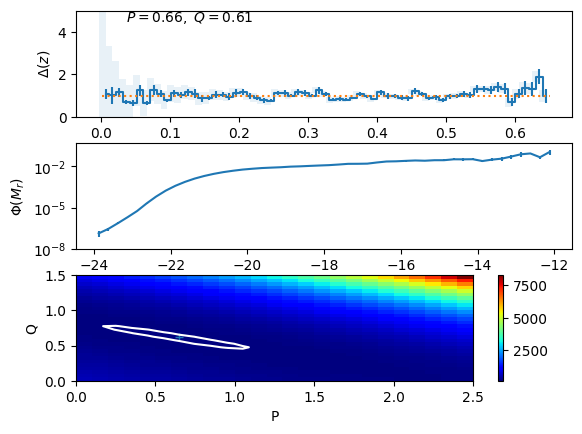

In [15]:
ev_fit(infile=df, outfile=r"E:\PhD\Jon\results\GAMAIII_evfit_post.fits", ref_mlims=(0, 19.65), band_mlims=(0, 19.65), Mmin=-24, Mmax=-12, Mbin=48, zmin=0.002, zmax=0.65, nz=65, 
       band_mag_col='m_r', ref_mag_col='m_r', band_kcorr_col='kcorr_vst_r', ref_kcorr_col='kcorr_vst_r', 
       kcoeffs_col='kcoeffs', band_pcoeffs_col='pcoeffs_vst_r', ref_pcoeffs_col='pcoeffs_vst_r', sc_col='SC', nq_col='NQ', z_col='Z', ra_col='RAcen', 
       njack = 12, ra_jack = (129, 133, 137, 174, 178, 182, 211.5, 215.5, 219.5, 339, 343, 347), 
       jack_area = np.array([20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 50.6/3, 50.6/3, 50.6/3]), 
       Pbins=(0.0, 2.5, 25), Qbins=(0.0, 1.5, 30), method='post', err_type='jackknife', lf_est='weight', survey='GAMAIII', area=230.6, 
       kc_responses=['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 'vista_h', 'vista_k', 'wise_w1', 'wise_w2'], 
       ref_index=4, band_index=4, p=p, H0=100, omega_l=0.7, z0=0.1)

c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\kcorrect\template.py:226: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)



************************
jswml.py version  2.0
Using Blanton kcorrections
survey :  GAMAIII
ref_mlims :  (0, 19.65)
band_mlims :  (0, 19.65)
redshift range : [ 0.002 ;  0.65 ]
area : 230.6
method :  lfchi
Kcorrect responses :  ['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 'vista_h', 'vista_k', 'wise_w1', 'wise_w2']
Error type :  jackknife
Jackknife regions :  (129, 133, 137, 174, 178, 182, 211.5, 215.5, 219.5, 339, 343, 347)
{}
H0, omega_l, z0, area/Sr =  100 0.7 0.1 0.070244777002815
202979 galaxies selected
No column r_sb; ignoring SB completeness
Setting LF bin limits Qmin, Qmax =  0.0 1.5
zlo, zhi, Mmin, Mmax, nbins


c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.002 0.2013846153846154 -39.169497696088925 -9.054777991167448 42
0.2013846153846154 0.65 -42.924252698751545 -19.519497696088926 17
0.002 0.2013846153846154 -39.017420773012 -9.201777991167447 41
0.2013846153846154 0.65 -42.09925269875154 -19.367420773012 15
Number of LF bins with more than 10 gals : 41 15
Q, P chi^2 grid using lfchi
P [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45]
Q [0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175
 1.225 1.275 1.325 1.375 1.425 1.475]


  0%|          | 0/30 [00:00<?, ?it/s]

Simplex optimization ...
Optimization terminated successfully.
         Current function value: 146.765280
         Iterations: 3
         Function evaluations: 7


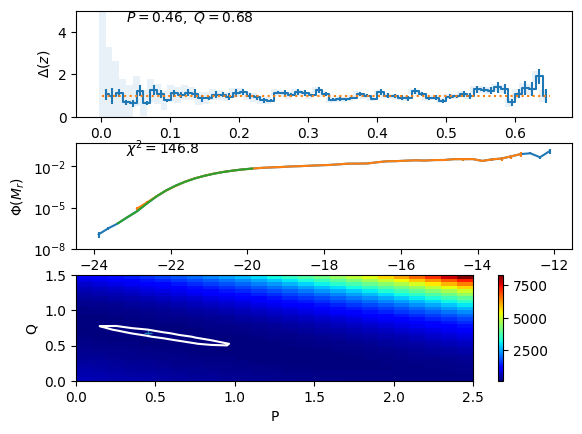

In [21]:
ev_fit(infile=df, outfile=r"E:\PhD\Jon\results\GAMAIII_evfit_lfchi.fits", ref_mlims=(0, 19.65), band_mlims=(0, 19.65), Mmin=-24, Mmax=-12, Mbin=48, zmin=0.002, zmax=0.65, nz=65, 
       band_mag_col='m_r', ref_mag_col='m_r', band_kcorr_col='kcorr_vst_r', ref_kcorr_col='kcorr_vst_r', 
       kcoeffs_col='kcoeffs', band_pcoeffs_col='pcoeffs_vst_r', ref_pcoeffs_col='pcoeffs_vst_r', sc_col='SC', nq_col='NQ', z_col='Z', ra_col='RAcen', 
       njack = 12, ra_jack = (129, 133, 137, 174, 178, 182, 211.5, 215.5, 219.5, 339, 343, 347), 
       jack_area = np.array([20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 50.6/3, 50.6/3, 50.6/3]), 
       Pbins=(0.0, 2.5, 25), Qbins=(0.0, 1.5, 30), method='lfchi', err_type='jackknife', lf_est='weight', survey='GAMAIII', area=230.6, 
       kc_responses=['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 'vista_h', 'vista_k', 'wise_w1', 'wise_w2'], 
       ref_index=4, band_index=4, p=p, H0=100, omega_l=0.7, z0=0.1)

In [14]:
# import pandas as pd
# df = pd.read_pickle(r"E:\PhD\Jon\pickle datafiles\GAMAIII_dataframe.pkl")
# from lf_ev import *

In [15]:
df09 = df[(df['RAcen']>129.0) & (df['RAcen']<141.0)]
df12 = df[(df['RAcen']>174.0) & (df['RAcen']<186.0)]
df15 = df[(df['RAcen']>211.5) & (df['RAcen']<223.5)]
df23 = df[(df['RAcen']>339.0) & (df['RAcen']<351.0)]

In [16]:
Vmax_out(infile=df09, evfile=r"E:\PhD\Jon\results\GAMAIII_evfit_lfchi.fits", outfile=r"E:\PhD\Jon\results\GAMAIII_G09.fits", ref_mlims=(0, 19.65), band_mlims=(0, 19.65), 
            Mmin=-24, Mmax=-12, Mbin=48, zmin=0.002, zmax=0.65, nz=65, band_mag_col='m_r', ref_mag_col='m_r', band_kcorr_col='kcorr_vst_r', ref_kcorr_col='kcorr_vst_r', 
            kcoeffs_col='kcoeffs', band_pcoeffs_col='pcoeffs_vst_r', ref_pcoeffs_col='pcoeffs_vst_r', sc_col='SC', nq_col='NQ', z_col='Z', ra_col='RAcen', 
            lf_est='weight', err_type='jackknife', survey='GAMAIII', area=60, 
            njack = 3, ra_jack = (129, 133, 137), jack_area = np.array([20.0, 20.0, 20.0]), 
            kc_responses=['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 'vista_h', 'vista_k', 'wise_w1', 'wise_w2'], 
            ref_index=4, band_index=4, p = p, H0 = 100.0, omega_l = 0.7, z0 = 0.1, idebug=1, 
            weights=None, use_ev_delta=False, only_ev=True, no_ev=False)
Vmax_out(infile=df12, evfile=r"E:\PhD\Jon\results\GAMAIII_evfit_lfchi.fits", outfile=r"E:\PhD\Jon\results\GAMAIII_G12.fits", ref_mlims=(0, 19.65), band_mlims=(0, 19.65), 
            Mmin=-24, Mmax=-12, Mbin=48, zmin=0.002, zmax=0.65, nz=65, band_mag_col='m_r', ref_mag_col='m_r', band_kcorr_col='kcorr_vst_r', ref_kcorr_col='kcorr_vst_r', 
            kcoeffs_col='kcoeffs', band_pcoeffs_col='pcoeffs_vst_r', ref_pcoeffs_col='pcoeffs_vst_r', sc_col='SC', nq_col='NQ', z_col='Z', ra_col='RAcen', 
            lf_est='weight', err_type='jackknife', survey='GAMAIII', area=60, 
            njack = 3, ra_jack = (174, 178, 182), jack_area = np.array([20.0, 20.0, 20.0]), 
            kc_responses=['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 'vista_h', 'vista_k', 'wise_w1', 'wise_w2'], 
            ref_index=4, band_index=4, p = p, H0 = 100.0, omega_l = 0.7, z0 = 0.1, idebug=1, 
            weights=None, use_ev_delta=False, only_ev=True, no_ev=False)
Vmax_out(infile=df15, evfile=r"E:\PhD\Jon\results\GAMAIII_evfit_lfchi.fits", outfile=r"E:\PhD\Jon\results\GAMAIII_G15.fits", ref_mlims=(0, 19.65), band_mlims=(0, 19.65), 
            Mmin=-24, Mmax=-12, Mbin=48, zmin=0.002, zmax=0.65, nz=65, band_mag_col='m_r', ref_mag_col='m_r', band_kcorr_col='kcorr_vst_r', ref_kcorr_col='kcorr_vst_r', 
            kcoeffs_col='kcoeffs', band_pcoeffs_col='pcoeffs_vst_r', ref_pcoeffs_col='pcoeffs_vst_r', sc_col='SC', nq_col='NQ', z_col='Z', ra_col='RAcen', 
            lf_est='weight', err_type='jackknife', survey='GAMAIII', area=60, 
            njack = 3, ra_jack = (211.5, 215.5, 219.5), jack_area = np.array([20.0, 20.0, 20.0]), 
            kc_responses=['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 'vista_h', 'vista_k', 'wise_w1', 'wise_w2'], 
            ref_index=4, band_index=4, p = p, H0 = 100.0, omega_l = 0.7, z0 = 0.1, idebug=1, 
            weights=None, use_ev_delta=False, only_ev=True, no_ev=False)
Vmax_out(infile=df23, evfile=r"E:\PhD\Jon\results\GAMAIII_evfit_lfchi.fits", outfile=r"E:\PhD\Jon\results\GAMAIII_G23.fits", ref_mlims=(0, 19.65), band_mlims=(0, 19.65), 
            Mmin=-24, Mmax=-12, Mbin=48, zmin=0.002, zmax=0.65, nz=65, band_mag_col='m_r', ref_mag_col='m_r', band_kcorr_col='kcorr_vst_r', ref_kcorr_col='kcorr_vst_r', 
            kcoeffs_col='kcoeffs', band_pcoeffs_col='pcoeffs_vst_r', ref_pcoeffs_col='pcoeffs_vst_r', sc_col='SC', nq_col='NQ', z_col='Z', ra_col='RAcen', 
            lf_est='weight', err_type='jackknife', survey='GAMAIII', area=50.6, 
            njack = 3, ra_jack = (339, 343, 347), jack_area = np.array([50.6/3, 50.6/3, 50.6/3]), 
            kc_responses=['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 'vista_h', 'vista_k', 'wise_w1', 'wise_w2'], 
            ref_index=4, band_index=4, p = p, H0 = 100.0, omega_l = 0.7, z0 = 0.1, idebug=1, 
            weights=None, use_ev_delta=False, only_ev=True, no_ev=False)

Using Blanton kcorrections
P, Q = 0.47250000000000003 0.675
survey :  GAMAIII
ref_mlims :  (0, 19.65)
band_mlims :  (0, 19.65)
redshift range : [ 0.002 ;  0.65 ]
area : 60
Kcorrect responses :  ['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 'vista_h', 'vista_k', 'wise_w1', 'wise_w2']
Error type :  jackknife
Jackknife regions :  (129, 133, 137)
Jackknife areas:  [20. 20. 20.]


c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\kcorrect\template.py:226: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)


Calculating Vmax values with evolution ...
H0, omega_l, z0, area/Sr =  100.0 0.7 0.1 0.018277045187202513
49762 galaxies selected
No column r_sb; ignoring SB completeness
Using Blanton kcorrections
P, Q = 0.47250000000000003 0.675
survey :  GAMAIII
ref_mlims :  (0, 19.65)
band_mlims :  (0, 19.65)
redshift range : [ 0.002 ;  0.65 ]
area : 60
Kcorrect responses :  ['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 'vista_h', 'vista_k', 'wise_w1', 'wise_w2']
Error type :  jackknife
Jackknife regions :  (174, 178, 182)
Jackknife areas:  [20. 20. 20.]


c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\kcorrect\template.py:226: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)


Calculating Vmax values with evolution ...
H0, omega_l, z0, area/Sr =  100.0 0.7 0.1 0.018277045187202513
54847 galaxies selected
No column r_sb; ignoring SB completeness
Using Blanton kcorrections
P, Q = 0.47250000000000003 0.675
survey :  GAMAIII
ref_mlims :  (0, 19.65)
band_mlims :  (0, 19.65)
redshift range : [ 0.002 ;  0.65 ]
area : 60
Kcorrect responses :  ['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 'vista_h', 'vista_k', 'wise_w1', 'wise_w2']
Error type :  jackknife
Jackknife regions :  (211.5, 215.5, 219.5)
Jackknife areas:  [20. 20. 20.]


c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\kcorrect\template.py:226: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)


Calculating Vmax values with evolution ...
H0, omega_l, z0, area/Sr =  100.0 0.7 0.1 0.018277045187202513
54257 galaxies selected
No column r_sb; ignoring SB completeness
Using Blanton kcorrections
P, Q = 0.47250000000000003 0.675
survey :  GAMAIII
ref_mlims :  (0, 19.65)
band_mlims :  (0, 19.65)
redshift range : [ 0.002 ;  0.65 ]
area : 50.6
Kcorrect responses :  ['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 'vista_h', 'vista_k', 'wise_w1', 'wise_w2']
Error type :  jackknife
Jackknife regions :  (339, 343, 347)
Jackknife areas:  [16.86666667 16.86666667 16.86666667]


c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\kcorrect\template.py:226: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)


Calculating Vmax values with evolution ...
H0, omega_l, z0, area/Sr =  100.0 0.7 0.1 0.015413641441207455
44113 galaxies selected
No column r_sb; ignoring SB completeness


c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
df09_ev = pickle.load(open(r"E:\PhD\Jon\results\GAMAIII_G09.fits", 'rb'))
df12_ev = pickle.load(open(r"E:\PhD\Jon\results\GAMAIII_G12.fits", 'rb'))
df15_ev = pickle.load(open(r"E:\PhD\Jon\results\GAMAIII_G15.fits", 'rb'))
df23_ev = pickle.load(open(r"E:\PhD\Jon\results\GAMAIII_G23.fits", 'rb'))

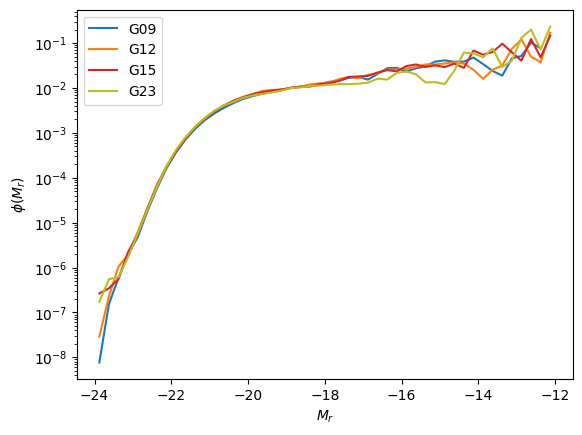

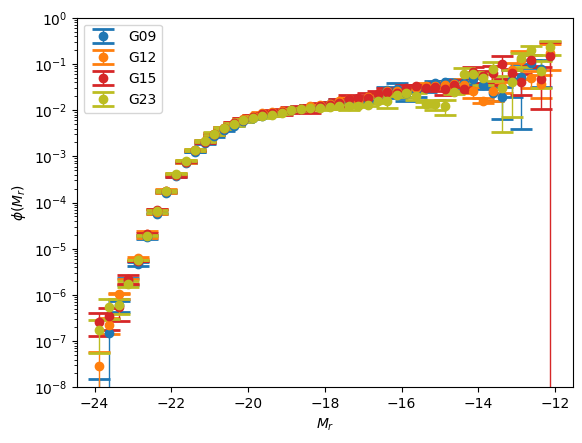

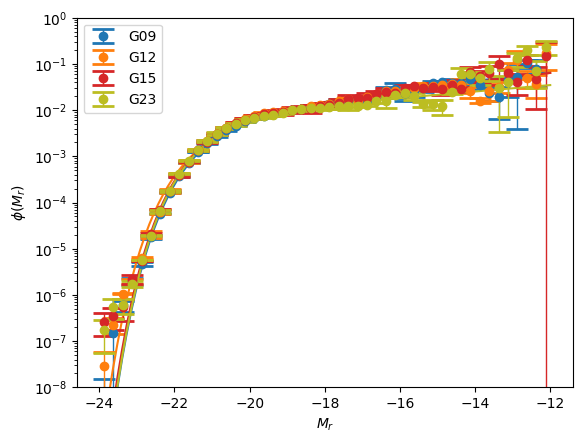

G09
M_star =  -20.737880058569562  ±  0.010604018581305165
alpha =  -1.266479045295414  ±  0.011596222119979755
phi_star =  0.008852589501992516  ±  0.00016542567035004159
G12
M_star =  -20.957478244846524  ±  0.04232063447450072
alpha =  -1.2751377572177198  ±  0.034063141459169444
phi_star =  0.007154222209135917  ±  0.0008920507758901373
G15
M_star =  -20.771939995381445  ±  0.009016467609609575
alpha =  -1.2483757380951526  ±  0.010475464721086946
phi_star =  0.009348755040504938  ±  0.0002547026823622581
G23
M_star =  -20.719488750653817  ±  0.017638657916999683
alpha =  -1.1723087347825358  ±  0.022355738177361202
phi_star =  0.009475519137660638  ±  0.0005731581205398744


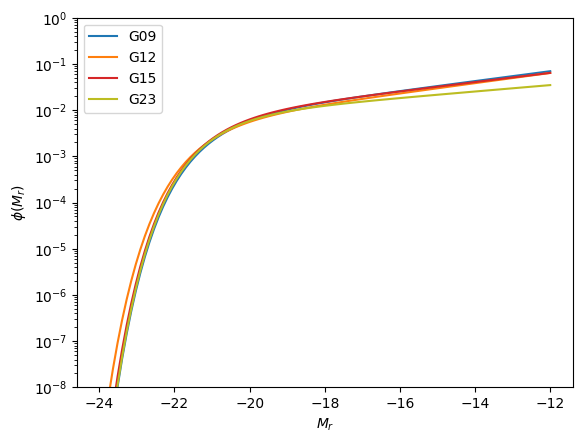

In [20]:
dfs = [df09_ev, df12_ev, df15_ev, df23_ev]
colors = ['C0', 'C1', 'C3', 'C8']
regions = ['G09', 'G12', 'G15', 'G23']
BinEdges = np.arange(-24, -12+0.25, 0.25)
bincenters = (BinEdges[:-1] + BinEdges[1:])/2

for i, dataframe in enumerate(dfs):
    mask = (dataframe['phi_dec'] > 0) & np.isfinite(dataframe['phi_dec'])
    plt.plot(bincenters[mask], dataframe['phi_dec'][mask], color=colors[i], label=regions[i])
plt.yscale('log')
plt.xlabel(f"$M_r$")
plt.ylabel(f"$\\phi(M_r)$")
plt.legend()
plt.show()

for i, dataframe in enumerate(dfs):
    mask = (dataframe['phi_dec'] > 0) & np.isfinite(dataframe['phi_dec'])
    plt.errorbar(bincenters[mask], dataframe['phi_dec'][mask], dataframe['phi_err_dec'][mask], fmt='o', capsize=8, elinewidth=1, capthick=2, label=regions[i], color=colors[i])
plt.ylim(1e-8, 1)
plt.yscale('log')
plt.xlabel(f"$M_r$")
plt.ylabel(f"$\\phi(M_r)$")
plt.legend()
plt.show()

def sch(M,M_star,alpha,phi):
    return 0.4 * np.log(10) * phi * (10**(0.4*(M_star - M)*(alpha+1))) * np.exp(-10**(0.4*(M_star - M)))

for i, dataframe in enumerate(dfs):
    mask = (dataframe['phi_dec'] > 0) & np.isfinite(dataframe['phi_dec'])
    plt.errorbar(bincenters[mask], dataframe['phi_dec'][mask], dataframe['phi_err_dec'][mask], fmt='o', capsize=8, elinewidth=1, capthick=2, label=regions[i], color=colors[i])
    popt, pcov = scipy.optimize.curve_fit(sch, bincenters[mask], dataframe['phi_dec'][mask], p0=(-20.71,-1.26,10**(-2.02)), sigma=dataframe['phi_err_dec'][mask])
    perr = np.sqrt(np.diag(pcov))
    x = np.linspace(-24, -12, 100)
    plt.plot(x, sch(x, popt[0], popt[1], popt[2]), color=colors[i])
plt.ylim(1e-8, 1)
plt.yscale('log')
plt.xlabel(f"$M_r$")
plt.ylabel(f"$\\phi(M_r)$")
plt.legend()
plt.show()

for i, dataframe in enumerate(dfs):
    mask = (dataframe['phi_dec'] > 0) & np.isfinite(dataframe['phi_dec'])
    popt, pcov = scipy.optimize.curve_fit(sch, bincenters[mask], dataframe['phi_dec'][mask], p0=(-20.71,-1.26,10**(-2.02)), sigma=dataframe['phi_err_dec'][mask])
    perr = np.sqrt(np.diag(pcov))
    x = np.linspace(-24, -12, 100)
    plt.plot(x, sch(x, popt[0], popt[1], popt[2]), color=colors[i], label=regions[i])
    print(regions[i])
    print('M_star = ',popt[0], ' ± ', perr[0])
    print('alpha = ',popt[1], ' ± ', perr[1])
    print('phi_star = ',(popt[2]), ' ± ', perr[2])
plt.ylim(1e-8, 1)
plt.yscale('log')
plt.xlabel(f"$M_r$")
plt.ylabel(f"$\\phi(M_r)$")
plt.legend()
plt.show()

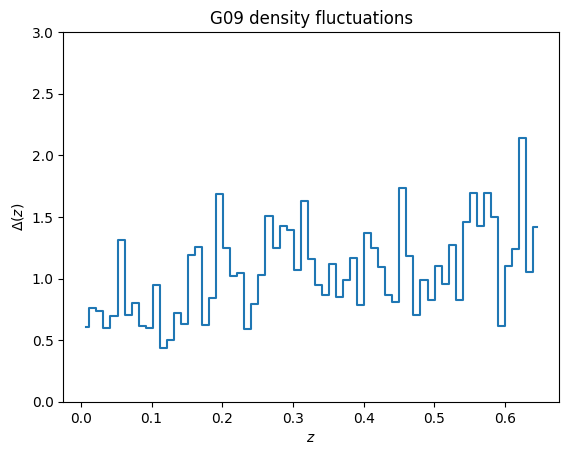

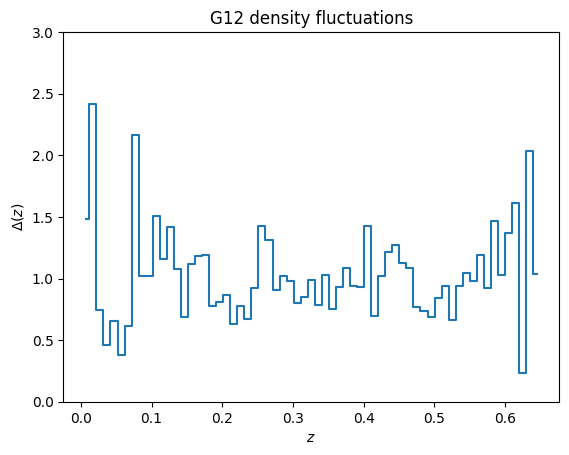

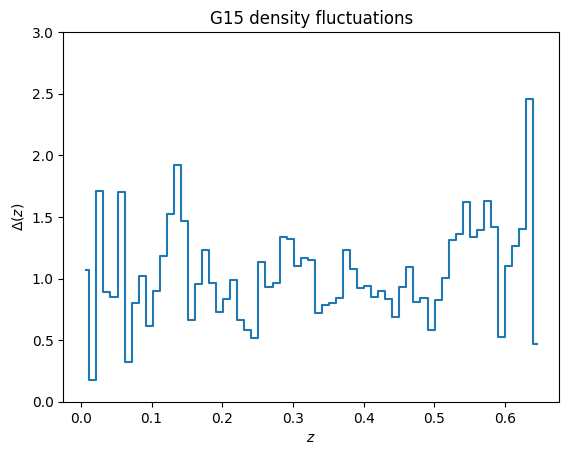

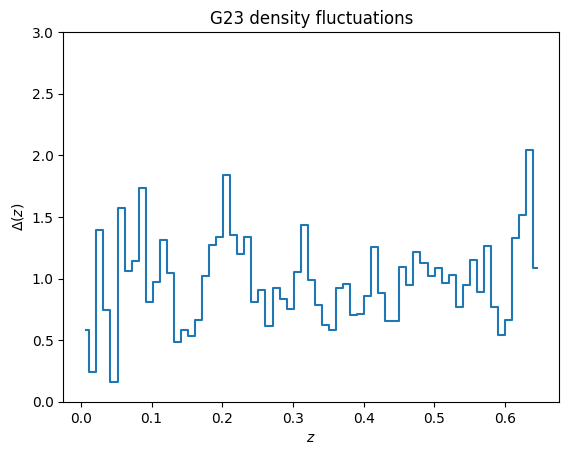

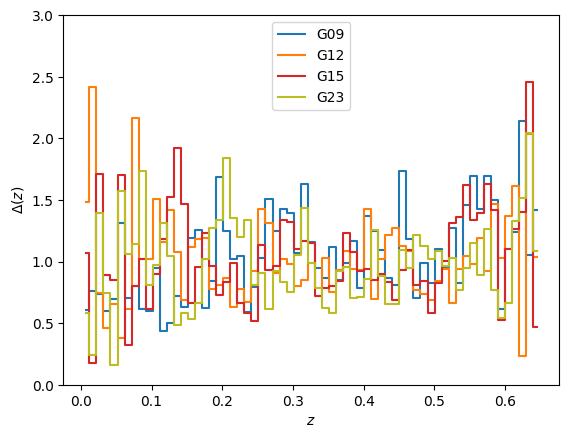

In [19]:
dfs = [df09_ev, df12_ev, df15_ev, df23_ev]
regions = ['G09', 'G12', 'G15', 'G23']
colors = ['C0', 'C1', 'C3', 'C8']
zbin_edges, zstep = np.linspace(0.002, 0.65, 65+1, retstep=True)
zbin = zbin_edges[:-1] + 0.5 * zstep

for i, dataframe in enumerate(dfs):
    plt.step(zbin, dataframe['delta'], where='mid')
    plt.title(f'{regions[i]} density fluctuations')
    plt.xlabel(f"$z$")
    plt.ylabel(r'$\Delta(z)$')
    plt.ylim(0, 3)
    plt.show()

for i, dataframe in enumerate(dfs):
    plt.step(zbin, dataframe['delta'], where='mid', color=colors[i], label=regions[i])
plt.xlabel(f"$z$")
plt.ylabel(r'$\Delta(z)$')
plt.ylim(0, 3)
plt.legend()
plt.show()